In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
long = pd.read_csv('02_dataset_worldbank_jobs_2016.tsv', na_values=['..'], sep="\t")
long.dropna(subset=["Country Code"], inplace=True)

In [3]:
wide = long.pivot(index = "Country Code", columns="Series Code", values="2016 [YR2016]")

In [4]:
(wide.dtypes==float).all()

True

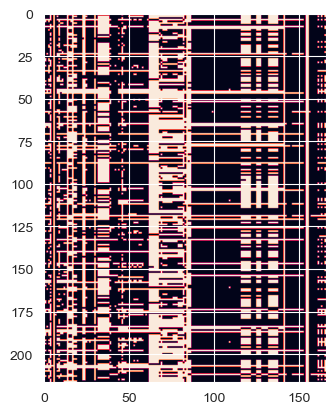

In [5]:
plt.imshow(wide.isna())

In [6]:
keep_rows = wide.isna().sum(1)[wide.isna().sum(1) < 60].index.values

filtered_wide = wide[wide.index.isin(keep_rows)].dropna(axis="columns", inplace=False)

filtered_wide

Series Code,BX.KLT.DINV.WD.GD.ZS,EG.ELC.ACCS.ZS,EN.POP.DNST,IT.CEL.SETS.P2,IT.MLT.MAIN.P2,IT.NET.USER.ZS,NY.GDP.MKTP.KD.ZG,SL.AGR.EMPL.FE.ZS,SL.AGR.EMPL.MA.ZS,SL.AGR.EMPL.ZS,...,SP.POP.1564.TO.ZS,SP.POP.65UP.TO,SP.POP.65UP.TO.ZS,SP.POP.DPND,SP.POP.GROW,SP.POP.TOTL,SP.RUR.TOTL,SP.RUR.TOTL.ZS,SP.URB.TOTL,SP.URB.TOTL.IN.ZS
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,0.480710,84.137138,53.083405,62.335417,0.329501,10.595726,2.366712,72.621002,59.122002,61.348999,...,53.598917,880803.0,2.541558,86.570932,2.689163,34656032.0,25985093.0,74.980,8670939.0,25.020
ALB,8.786734,100.000000,104.967190,115.152265,8.496597,66.363445,3.352159,47.271999,35.806000,40.659000,...,69.443689,369116.0,12.833914,44.001540,-0.159880,2876101.0,1195854.0,41.579,1680247.0,58.421
ARE,2.516687,100.000000,110.880526,214.734910,24.659166,90.600007,2.988442,0.013000,0.186000,0.166000,...,85.028100,100499.0,1.084177,17.608178,1.251759,9269612.0,1300990.0,14.035,7968622.0,85.965
ARG,0.587564,100.000000,16.022067,145.330506,22.666391,70.968981,-1.822542,0.172000,0.808000,0.552000,...,63.880519,4849887.0,11.060824,56.542246,0.984742,43847430.0,3671345.0,8.373,40176085.0,91.627
ARM,3.206058,100.000000,102.733263,117.428481,18.176323,64.346030,0.200000,38.342999,30.448999,34.050999,...,69.015521,323610.0,11.064286,44.894943,0.269302,2924816.0,1079784.0,36.918,1845032.0,63.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.321023,100.000000,68.948763,77.390391,4.960410,29.411730,7.145169,3.262000,6.142000,5.109000,...,57.678411,10658.0,5.462140,73.375094,0.702526,195125.0,158674.0,81.319,36451.0,18.681
YEM,-3.080162,71.642349,52.245796,59.574130,4.226432,24.579208,-34.339754,57.243000,34.388000,35.962002,...,56.850427,797863.0,2.892462,75.900173,2.451502,27584213.0,17821057.0,64.606,9763156.0,35.394
ZAF,0.749015,84.200000,46.175859,147.125206,8.074287,54.000000,0.565363,3.896000,6.881000,5.584000,...,65.613105,2918033.0,5.209334,52.408578,1.301374,56015473.0,19414403.0,34.659,36601070.0,65.341


In [7]:
long[long["Series Code"].isin(filtered_wide.columns)]["Series Name"].drop_duplicates()[:30]

0               Access to electricity (% of population)
1     Adolescent fertility rate (births per 1,000 wo...
2     Age dependency ratio (% of working-age populat...
10    Contributing family workers, female (% of fema...
11    Contributing family workers, male (% of male e...
12    Contributing family workers, total (% of total...
25    Employers, female (% of female employment) (mo...
26    Employers, male (% of male employment) (modele...
27    Employers, total (% of total employment) (mode...
28    Employment in agriculture (% of total employme...
29    Employment in agriculture, female (% of female...
30    Employment in agriculture, male (% of male emp...
31    Employment in industry (% of total employment)...
32    Employment in industry, female (% of female em...
33    Employment in industry, male (% of male employ...
34    Employment in services (% of total employment)...
35    Employment in services, female (% of female em...
36    Employment in services, male (% of male em

In [8]:
pca = PCA(3)
pca_transformed = pca.fit_transform(filtered_wide)

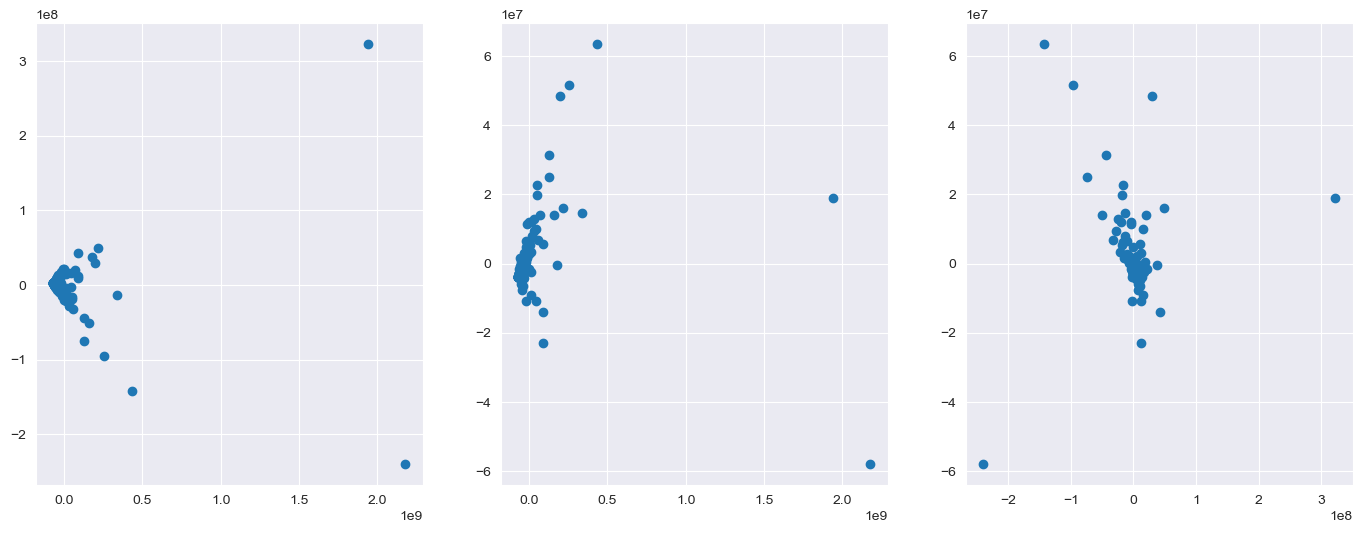

In [9]:
plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1])

plt.subplot(132)
plt.scatter(pca_transformed[:,0], pca_transformed[:,2])

plt.subplot(133)
plt.scatter(pca_transformed[:,1], pca_transformed[:,2])

In [10]:
filtered_scaled_wide = (filtered_wide - filtered_wide.mean())/filtered_wide.std()

In [11]:
pca = PCA(3)
pca_transformed = pca.fit_transform(filtered_scaled_wide)

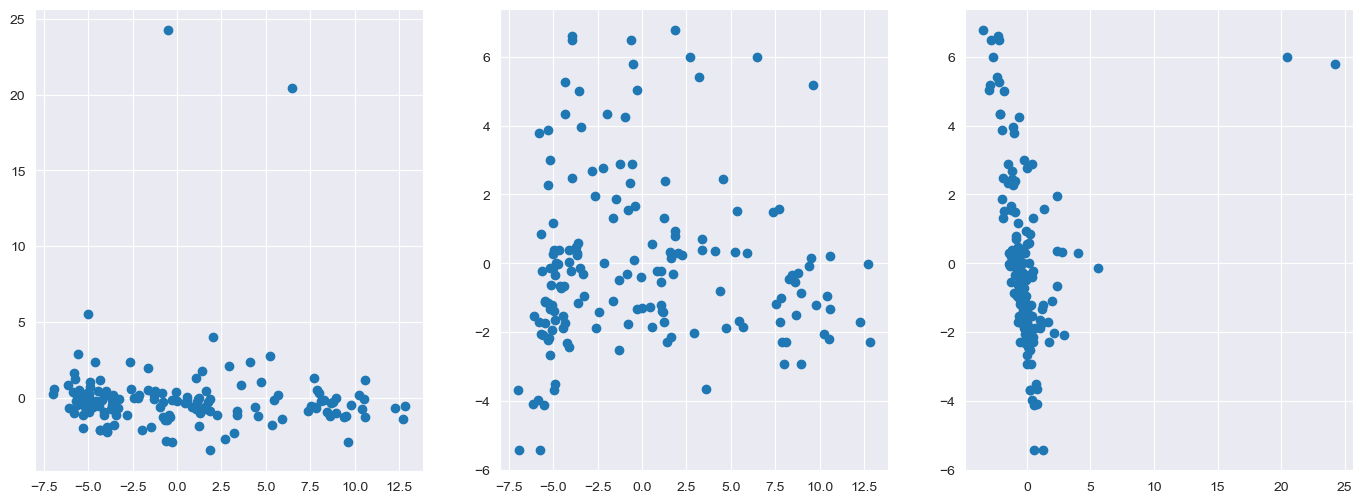

In [12]:
plt.figure(figsize=(17, 6))
plt.subplot(131)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1])

plt.subplot(132)
plt.scatter(pca_transformed[:,0], pca_transformed[:,2])

plt.subplot(133)
plt.scatter(pca_transformed[:,1], pca_transformed[:,2])

In [13]:
#Coefficients
pca.components_[1][abs(pca.components_[1]).argsort()[::-1]]

array([ 0.33763442,  0.3367507 ,  0.33672968,  0.33609285,  0.32863095,
        0.32635215,  0.31778207,  0.31732166, -0.12075835, -0.1207048 ,
       -0.11276764, -0.11217139, -0.10855948, -0.10059145,  0.06996052,
       -0.06874212,  0.06615741,  0.06065932, -0.06045696, -0.05745751,
       -0.05725861,  0.05555325,  0.0543866 ,  0.05010841,  0.04718309,
       -0.04680294,  0.03911873, -0.03877924,  0.03872902, -0.03458033,
       -0.03331259,  0.03147697,  0.02163999, -0.02108435,  0.01959383,
       -0.01818181,  0.01745559,  0.01708852, -0.01667367,  0.01552837,
        0.01491217, -0.01295152,  0.01293582,  0.01282131,  0.01273681,
        0.01225864,  0.01167264, -0.01135923,  0.01135923, -0.01080611,
        0.01080611,  0.01040203, -0.00990515,  0.00990515,  0.00960637,
       -0.00960637, -0.00571485,  0.0046303 ,  0.00462729,  0.00443809,
       -0.00364537,  0.00173457])

In [14]:
#Names of the features with large coefficient
[long[long["Series Code"]==i]["Series Name"].values[0] for i in wide.columns[abs(pca.components_[1]).argsort()[::-1]]]

['Agriculture, value added (annual % growth)',
 'Industry, value added (annual % growth)',
 'New businesses registered (number)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'GDP per capita (constant 2005 US$)',
 'Manufacturing, value added (constant 2005 US$)',
 'Industry, value added (% of GDP)',
 'Imports of goods and services (% of GDP)',
 'Fixed broadband Internet subscribers (per 100 people)',
 'Exports of goods and services (annual % growth)',
 'Individuals using the Internet (% of population)',
 'Air transport, registered carrier departures worldwide',
 'Telephone lines (per 100 people)',
 'Mobile cellular subscriptions (per 100 people)',
 'Agriculture, value added (% of GDP)',
 'Manufacturing, value added (% of GDP)',
 'Time to prepare and pay taxes (hours)',
 'Electric power consumption (kWh per capita)',
 'Exports of goods and services (% of GDP)',
 'Gross capital formation (% of GDP)',
 'Agriculture, value added (constant 2005 US$)',
 'C

C:\Users\deuts\anaconda3\envs\dataspellmain\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\deuts\anaconda3\envs\dataspellmain\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


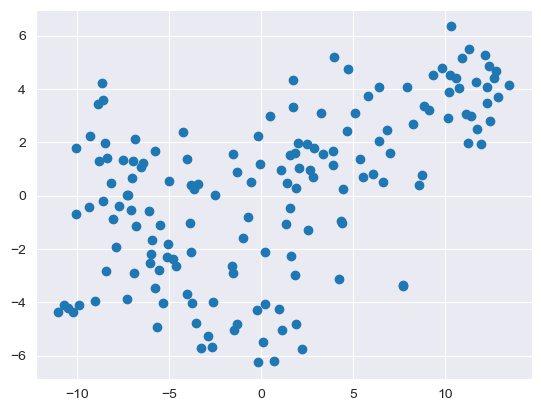

In [15]:
tsne = TSNE()
ts_transformed = tsne.fit_transform(filtered_scaled_wide)
plt.scatter(ts_transformed[:,0], ts_transformed[:,1])

In [16]:
countries = filtered_scaled_wide.index.tolist()

In [17]:
def my_plot(x, y, countries, hl=['HUN', 'GRC', 'RUS', "CHN"]):
    sc = plt.scatter(x, y)
    for idx, c in enumerate(countries):
        if c in hl:
            plt.text(x[idx], y[idx], c, fontsize=15)
            #Make color same as the previous point (for more clusters in KMeans)
            color = sc.get_facecolor()
            plt.scatter([x[idx]],[y[idx]], c=color, s=150)
        else:
            plt.text(x[idx], y[idx], c, fontsize=8)

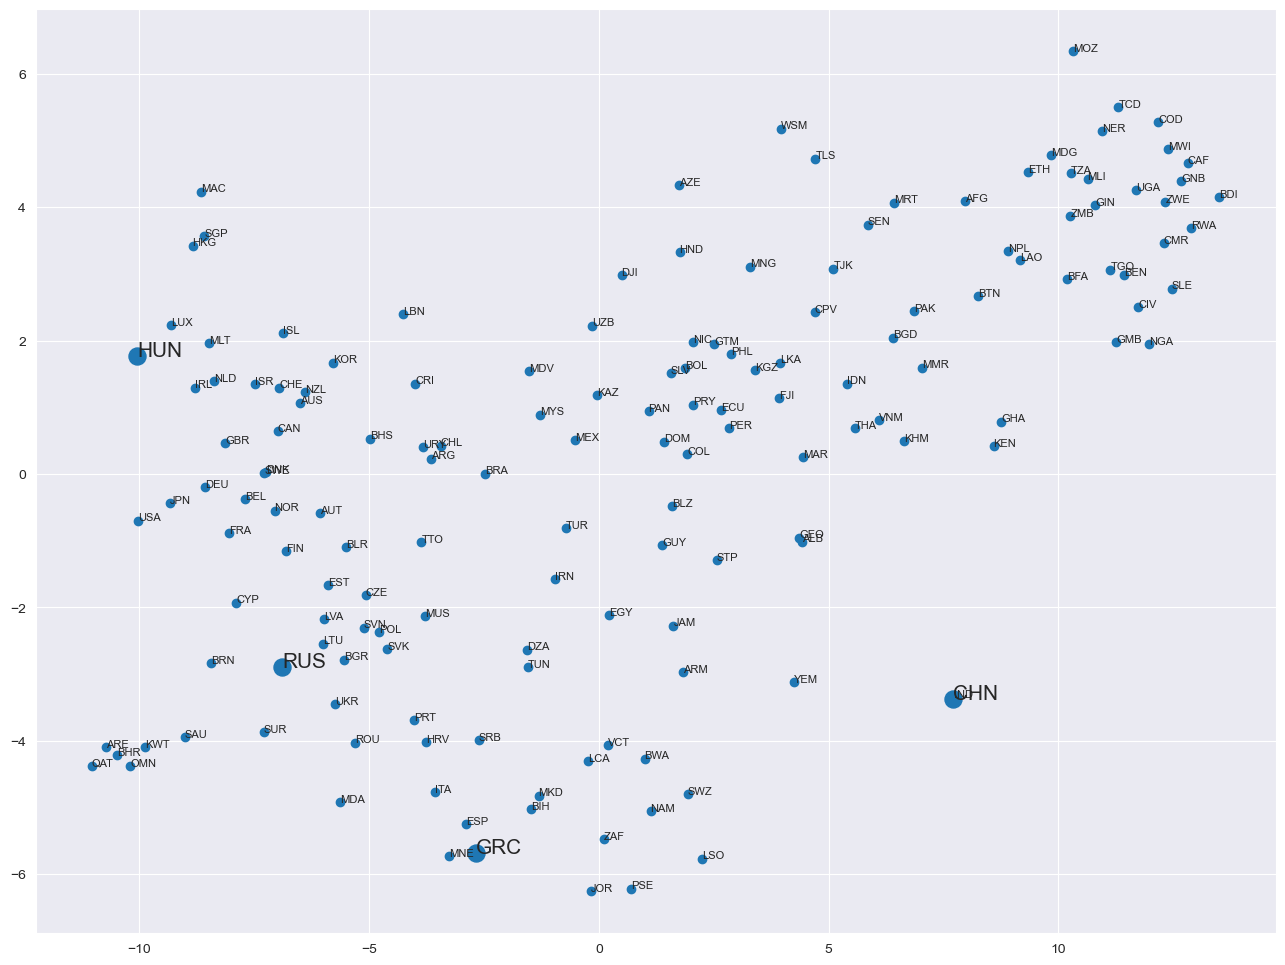

In [18]:
plt.figure(figsize=(16, 12))
my_plot(ts_transformed[:,0], ts_transformed[:,1], countries)

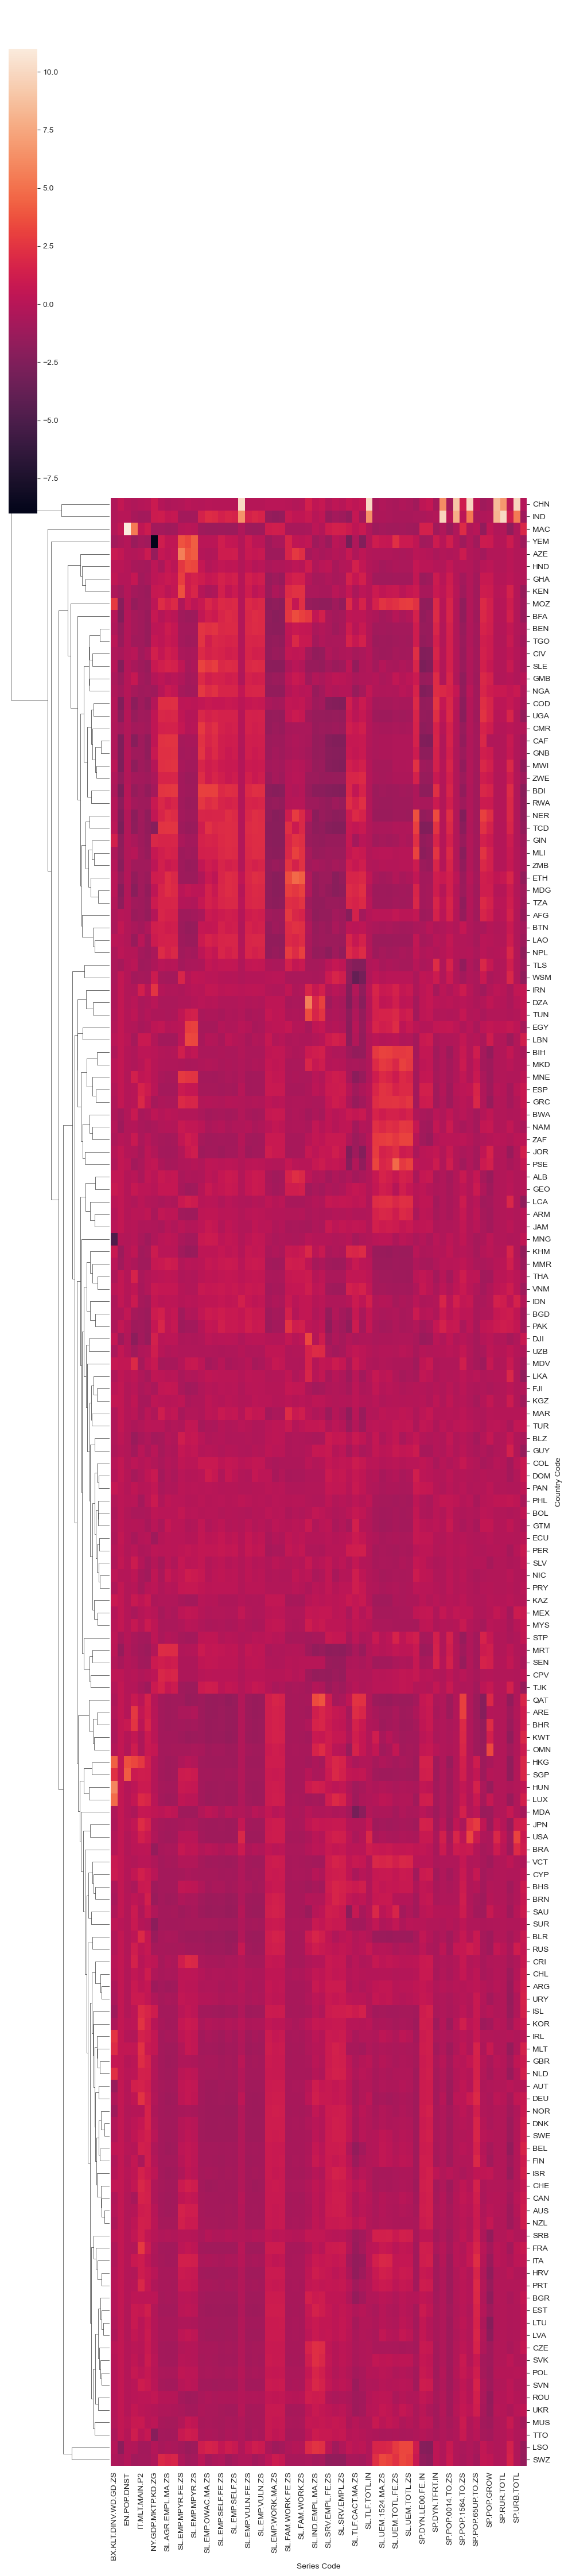

In [19]:
sns.clustermap(filtered_scaled_wide, col_cluster=False, figsize=(10, 45))

C:\Users\deuts\anaconda3\envs\dataspellmain\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


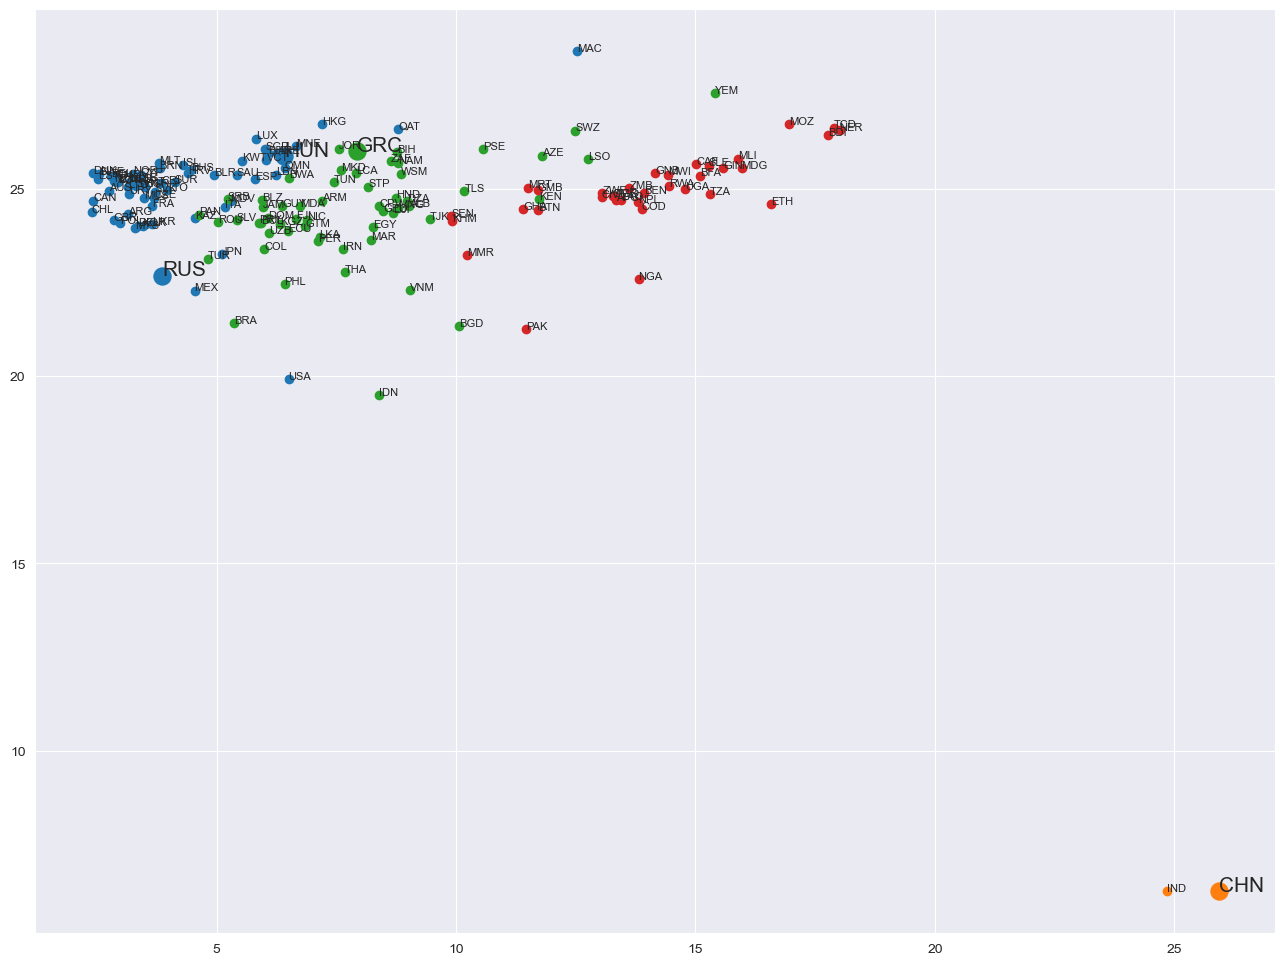

In [20]:
kmeans = KMeans(4)
km_transformed = kmeans.fit_transform(filtered_scaled_wide)
labels=kmeans.labels_
plt.figure(figsize=(16, 12))
for l in np.unique(labels):
    my_plot(km_transformed[:,0][l==labels], km_transformed[:,1][l==labels], np.array(countries)[l==labels])